In [1]:
from CLasso import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
To generate the data :
'''

m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

In [3]:
'''
To define the problem :
'''
problem = classo_problem(X,y,C)

In [4]:
'''
To solve the problem with its default parameters :
'''

problem.solve()

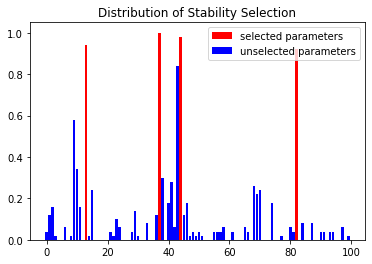

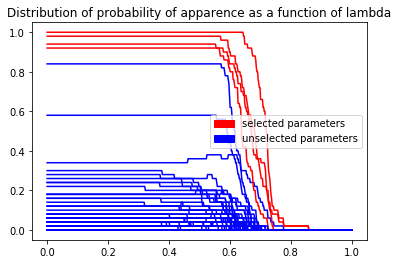

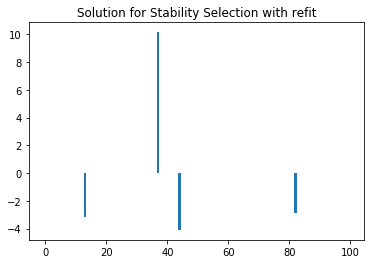

Cross Validation         : 'not computed'
Stability Selection      :  Running time for Stability Selection    : 4.323s
Solution for a fixed lam : 'not computed'

In [5]:
'''
To plot the solutions, as graphs :
'''
problem.solution

In [6]:
print(problem.solution.__dict__.keys())

print("\n To see the variables in problem ")
print(" then one can just print one of the components of problem : problem.data for example : \n")
print(problem.__dict__.keys() )

print("\n To see the formulation of the problem, either as a dictionary or as a string : \n ")
print(problem.formulation)
print(problem.formulation.__dict__)


print("\n To see the model selection, or its parameters  : \n ")
print(problem.model_selection)
print(problem.model_selection.__dict__)


print("\n To know what are the Stability Selection parameters \n (also works for Cross Validation parameters, or fixed Lam parameters)  : \n ")
print(problem.model_selection.SSparameters.__dict__)


print("\n To see what is inside the solution : \n " )

print(problem.solution.SS.__dict__.keys())


dict_keys(['CV', 'SS', 'LAMfixed'])

 To see the variables in problem 
 then one can just print one of the components of problem : problem.data for example : 

dict_keys(['data', 'formulation', 'model_selection', 'solution'])

 To see the formulation of the problem, either as a dictionary or as a string : 
 
Concomitant
{'huber': False, 'concomitant': True, 'rho': 1.345}

 To see the model selection, or its parameters  : 
 
SS, 
{'CV': False, 'CVparameters': Nsubset = 5  lamin = 0.001  n_lam = 500;  numerical_method = choose, 'SS': True, 'SSparameters': method = first;  lamin = 0.01;  B = 50;  q = 10;  pourcent_nS = 0.5;  threshold = 0.9;  numerical_method = ODE, 'LAMfixed': False, 'LAMfixedparameters': lam = theoritical;  theoritical_lam = 0.0;  numerical_method = choose}

 To know what are the Stability Selection parameters 
 (also works for Cross Validation parameters, or fixed Lam parameters)  : 
 
{'seed': 1, 'formulation': Concomitant, 'numerical_method': 'ODE', 'method': 'first'

In [7]:
'''
To solve a problem different than the default parameters :

'''
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = True
problem.formulation.concomitant             = False
problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.SSparameters.method = 'max'

In [8]:
problem.solve()

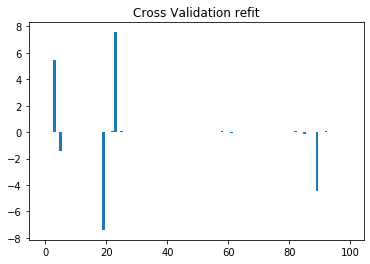

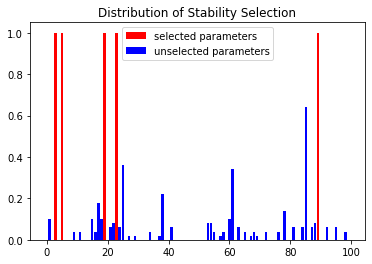

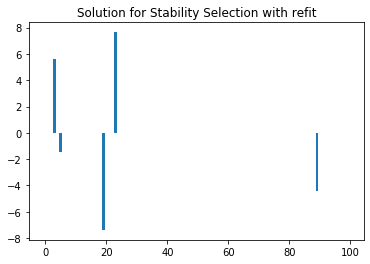

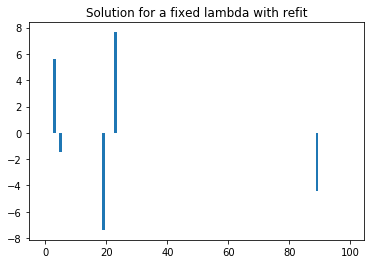

Cross Validation         :  Running time for Cross Validation    : 1.878s
Stability Selection      :  Running time for Stability Selection    : 2.843s
Solution for a fixed lam :  Running time for LAM fixed       : 0.11s

In [9]:
problem.solution

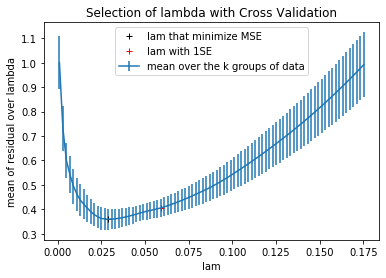

In [10]:
problem.solution.CV.graphic(mse_max = 1.)

In [11]:
lam = problem.solution.CV.xGraph[problem.solution.CV.index_1SE]
print('selected lambda with 1SE method in cross validation : ', lam)

selected lambda with 1SE method in cross validation :  0.05905811623246482


In [12]:
'''
To show that the CV (also works for SS) depends only on the seed we choose :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.08962784366895084


In [ ]:
m,d,d_nonzero,k,sigma =20,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)
pathlasso

In [6]:
np.sign()

-1